In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv
/kaggle/input/gemstone-price-prediction/Data Dictionary.xlsx


In [2]:
#import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

In [3]:
df=pd.read_csv('/kaggle/input/gemstone-price-prediction/cubic_zirconia.csv')
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,x,y,z,price
0,1,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,2,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,3,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,4,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,5,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [4]:
df.shape


(26967, 11)

* we have 26967 rows and 11 columns
* we have a column(Unnamed:0 ) which need to be removed

***Removing missing values, duplicates, and unnecessary rows/ columns , reformatting data.***

In [5]:
df.drop(columns='Unnamed: 0',inplace=True)
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,0.30,Ideal,E,SI1,62.1,58.0,4.27,4.29,2.66,499
1,0.33,Premium,G,IF,60.8,58.0,4.42,4.46,2.70,984
2,0.90,Very Good,E,VVS2,62.2,60.0,6.04,6.12,3.78,6289
3,0.42,Ideal,F,VS1,61.6,56.0,4.82,4.80,2.96,1082
4,0.31,Ideal,F,VVS1,60.4,59.0,4.35,4.43,2.65,779


In [6]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26967 entries, 0 to 26966
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    26967 non-null  float64
 1   cut      26967 non-null  object 
 2   color    26967 non-null  object 
 3   clarity  26967 non-null  object 
 4   depth    26270 non-null  float64
 5   table    26967 non-null  float64
 6   x        26967 non-null  float64
 7   y        26967 non-null  float64
 8   z        26967 non-null  float64
 9   price    26967 non-null  int64  
dtypes: float64(6), int64(1), object(3)
memory usage: 6.1 MB


* only column depth has null values
* columns [cut,color,clarity] can be converted into categorical

In [7]:
pd.Categorical(df.color , categories =['J','I','H','G','F','E','D'])
pd.Categorical(df.cut , categories =['Fair','Good','Very Good','Premium','Ideal'])
pd.Categorical(df.clarity , categories =['I3','I2','I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF','FL'])

['SI1', 'IF', 'VVS2', 'VS1', 'VVS1', ..., 'SI1', 'IF', 'VS2', 'VVS2', 'SI1']
Length: 26967
Categories (11, object): ['I3', 'I2', 'I1', 'SI2', ..., 'VVS2', 'VVS1', 'IF', 'FL']

In [8]:
df.describe(percentiles=[0.25,0.5,0.75,0.9])

,carat,depth,table,x,y,z,price
count,26967.000000,26270.000000,26967.000000,26967.000000,26967.000000,26967.000000,26967.000000
mean,0.798375,61.745147,57.456080,5.729854,5.733569,3.538057,3939.518115
std,0.477745,1.412860,2.232068,1.128516,1.166058,0.720624,4024.864666
min,0.200000,50.800000,49.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.710000,2.900000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2375.000000
75%,1.050000,62.500000,59.000000,6.550000,6.540000,4.040000,5360.000000
90%,1.510000,63.300000,60.000000,7.310000,7.310000,4.520000,9920.400000
max,4.500000,73.600000,79.000000,10.230000,58.900000,31.800000,18818.000000


In [9]:
df.describe(include='object')


,cut,color,clarity
count,26967,26967,26967
unique,5,7,8
top,Ideal,G,SI1
freq,10816,5661,6571


In [10]:
for i in ['cut','color','clarity']:
    print(f'{i} unique values : {df[i].unique()}')


cut unique values : ['Ideal' 'Premium' 'Very Good' 'Good' 'Fair']
color unique values : ['E' 'G' 'F' 'D' 'H' 'J' 'I']
clarity unique values : ['SI1' 'IF' 'VVS2' 'VS1' 'VVS1' 'VS2' 'SI2' 'I1']


* values of dimensions(x,y,z) are zero which is practically not possible
* mean and median for all columns have not much difference 
* x and y dimension values lies in same range but y value has max value 58 which is an outlier
* price columns shows that most data values lies within 10000 
* most occuring values are ideal cut , color G , SI1 clarity

In [11]:
#drop 0 dimension values 
for i in ['x','y','z']:
    df = df.drop(df[df[i]==0].index)
    

In [12]:
df.shape

(26958, 10)

In [13]:
#checking duplicate values
duplicates = df.duplicated()
print(duplicates.sum())

33


In [14]:
#drop duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [15]:
df.skew()


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat    1.114871
depth   -0.025042
table    0.764890
x        0.402010
y        3.888607
z        2.639529
price    1.619055
dtype: float64

In [16]:
df.kurtosis()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


carat      1.212235
depth      3.686635
table      1.579418
x         -0.720965
y        160.727513
z         88.516471
price      2.152993
dtype: float64

* price and carat cols are skewed
* y value has higher kurtosis because of outlier , x col have very less data values near tail
* depth has very little skew (we can fill null values with mean)


In [17]:
#fill null values

df['depth'].fillna(df['depth'].mean(),inplace=True)
df['depth'].isna().sum()

0

**Univariate Analysis:** 

In [18]:
num_cols= ['price','carat','depth','table','x','y','z']
cat_cols=['color','cut','clarity']

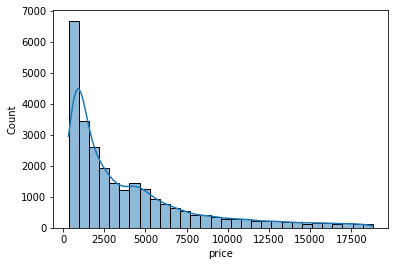

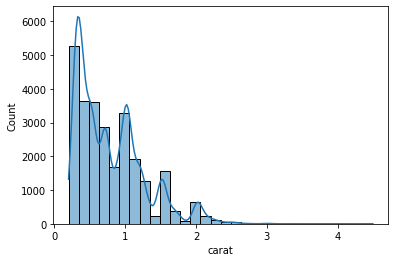

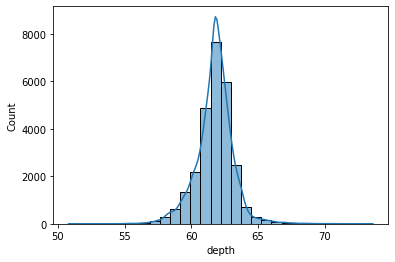

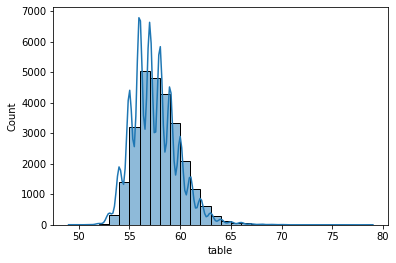

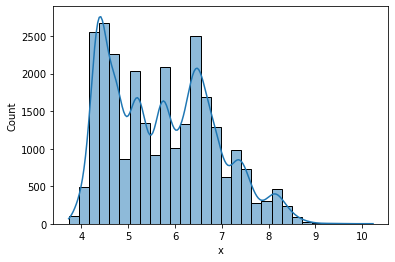

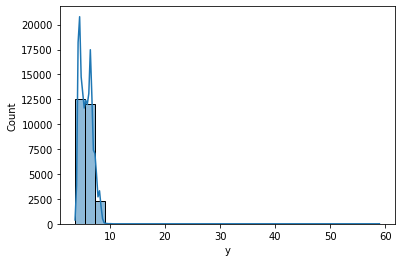

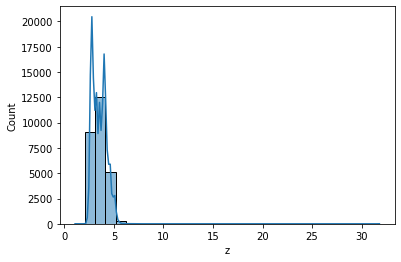

In [19]:
for i in num_cols:
    sns.histplot(df[i],bins=30,kde=True)
    plt.show()

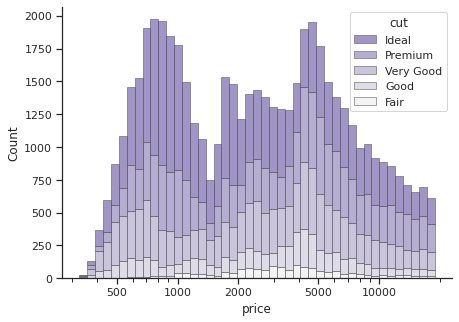

In [20]:

sns.set_theme(style="ticks")

diamonds = sns.load_dataset("diamonds")

f, ax = plt.subplots(figsize=(7, 5))
sns.despine(f)

sns.histplot(
    diamonds,
    x="price", hue="cut",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    log_scale=True,
)
ax.xaxis.set_major_formatter(mpl.ticker.ScalarFormatter())
ax.set_xticks([500, 1000, 2000, 5000, 10000])


* the percentage difference in price is not skewed and we have two mode points.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


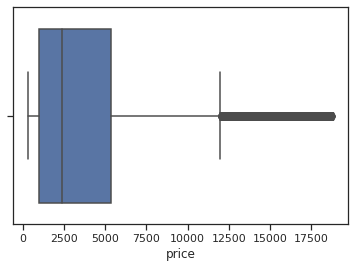

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


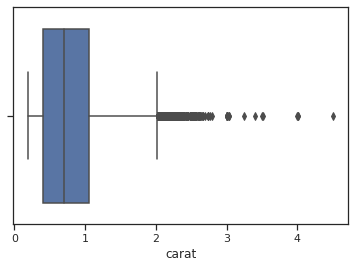

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


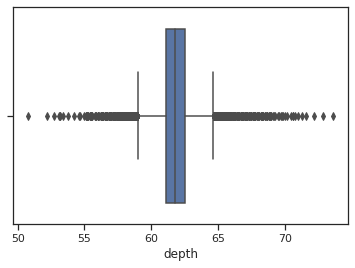

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


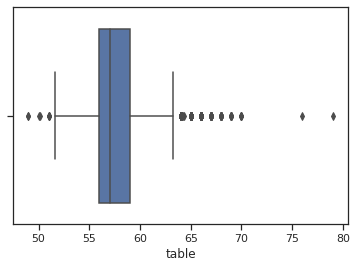

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


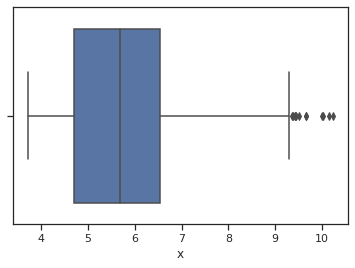

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


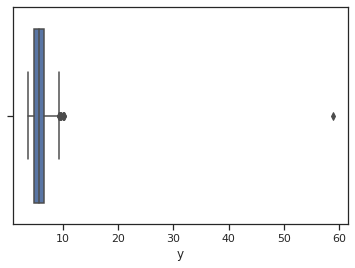

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


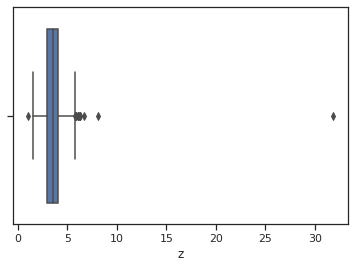

In [21]:
for i in num_cols:
    sns.boxplot(df[i])
    plt.show()

* outliers in price represents most expensive diamonds so we will keep it
* columns y and z outliers are far from data points 
* we remove outliers from x,y,z 

In [22]:
### Outlier treatment :
print(f'before outlier removal :{df.shape}')
for i in ['x','y','z']:
    Q1,Q3=df[i].quantile([.25,.75])
    IQR=Q3-Q1
    lw= Q1-(1.5 * IQR)
    up= Q3+(1.5 * IQR)
    df=df[(df[i]>(lw)) & (df[i]<up)]
    
print(f'after outlier remoal :{df.shape}')


before outlier removal :(26925, 10)
after outlier remoal :(26906, 10)


**Bivariate analysis**

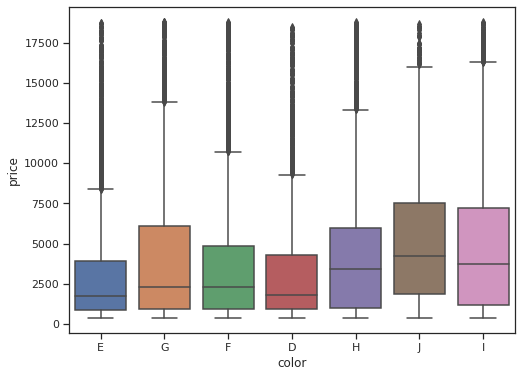

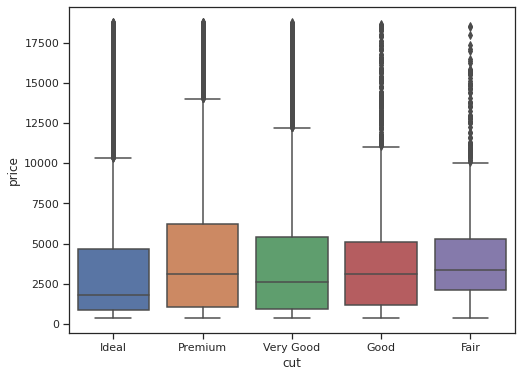

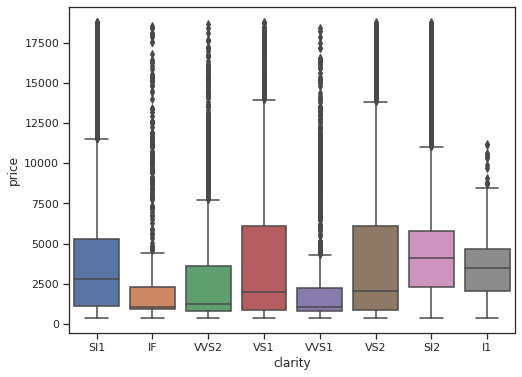

In [23]:
for i in cat_cols:
    plt.figure(figsize=(8,6))
    sns.boxplot(x=i,y='price',data=df)
    plt.show()

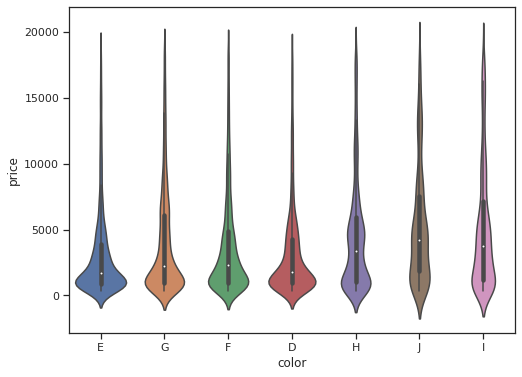

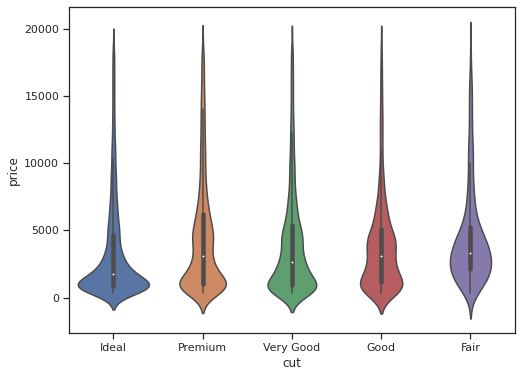

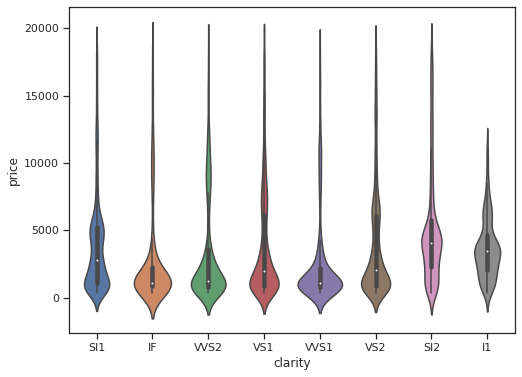

In [24]:
for i in cat_cols:
    plt.figure(figsize=(8,6))
    sns.violinplot(x=i,y='price',data=df)
    plt.show()

* colors j and i have higher price and less outliers
* colors d and e have lower price and more outliers
* premium cuts have higher price with little outliers
* fair cuts have better price compared to very good cuts in range of 0 to 5000
* vs1 and vs2 and sI1 have good prices but SI1 has more outliers than vs1 and vs2
* l1 and sI2 price range is higher than vs1 and vs2

<AxesSubplot:>

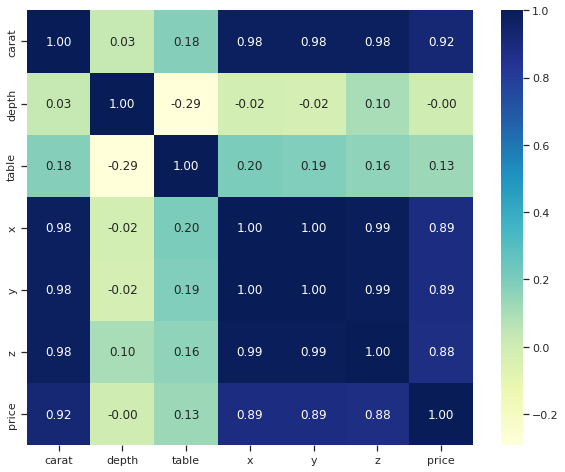

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),cmap="YlGnBu",annot=True,fmt='.2f')

* depth and table has very little correlation with other variables
* price is positively correlated with carat 
* the dimensions ( x , y ,z ) correlated to each other

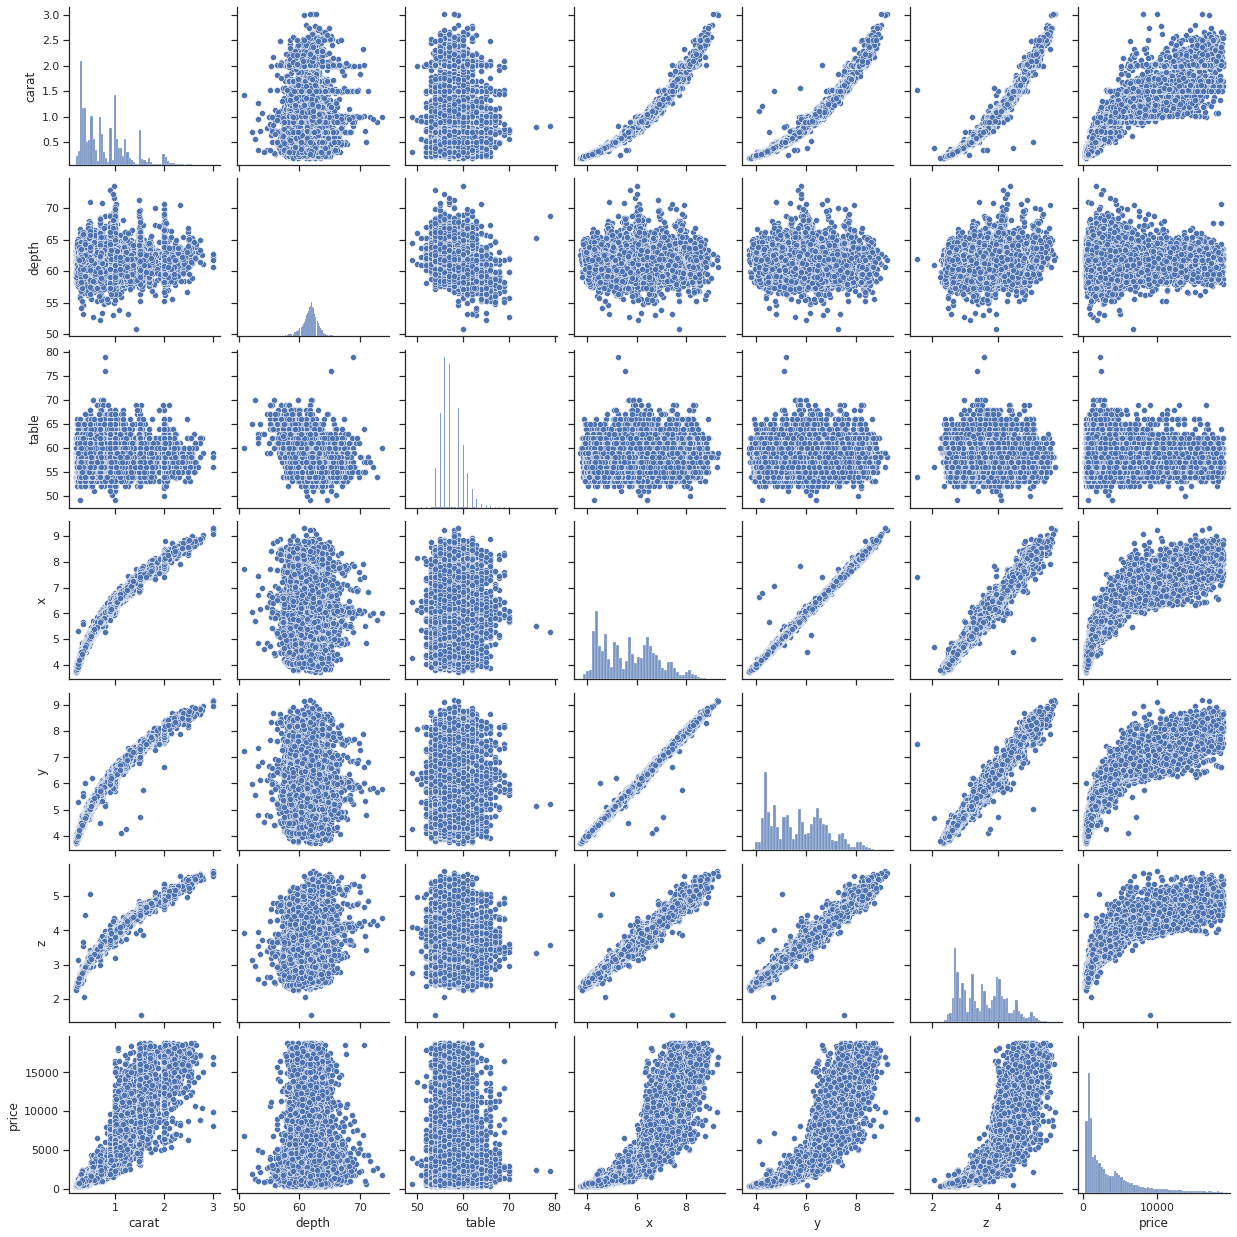

In [26]:
sns.pairplot(df)

* table and depth has no relationship with price
* other variables are positively correlated with price
* data points are overlapped in plots with respect to price

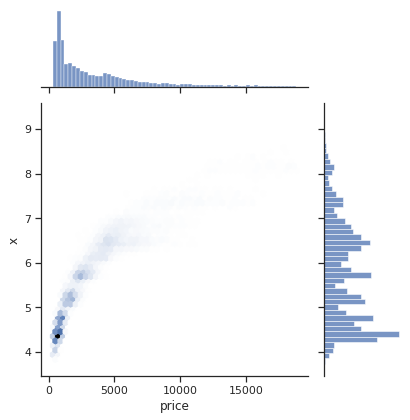

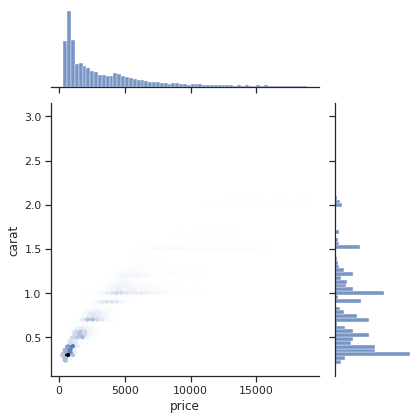

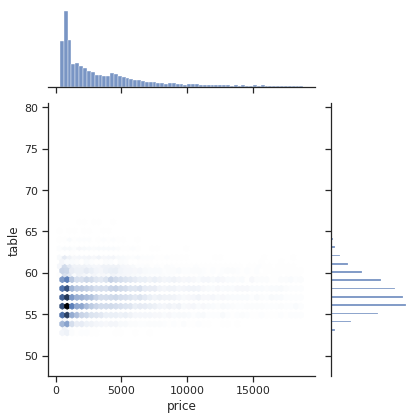

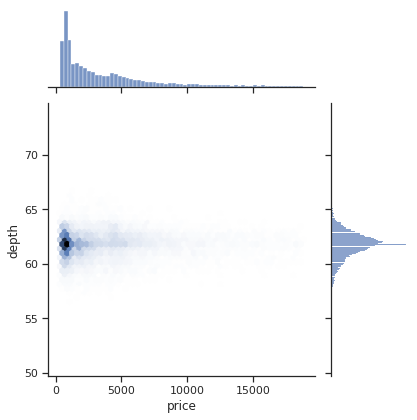

In [27]:
sns.set_theme(style="ticks")
for i in ['x','carat','table','depth']:
    sns.jointplot(x=df.price,y=df[i],kind='hex',ratio=3)

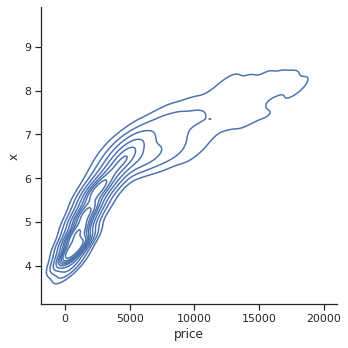

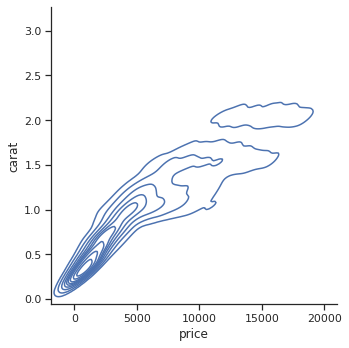

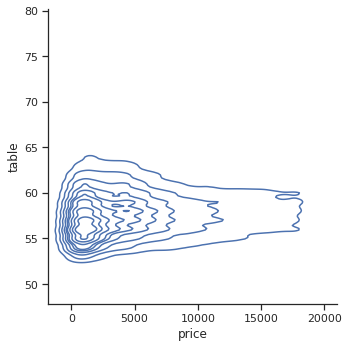

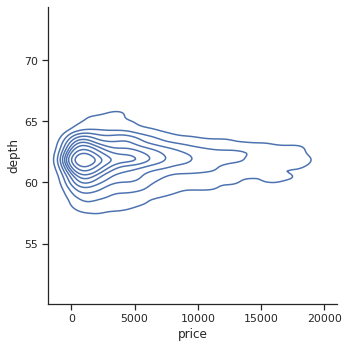

In [28]:

sns.set_theme(style="ticks")
for i in ['x','carat','table','depth']:
    sns.displot(x=df.price,y=df[i],kind='kde')

* carat value more than 2 falls only under price more than 10000


In [29]:
pd.crosstab(df.color,df.clarity)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
color,,,,,,,,
D,24,38,1039,669,369,804,121,276
E,53,87,1249,849,624,1202,342,509
F,67,182,1087,749,672,1106,360,498
G,66,340,998,777,1075,1205,507,681
H,79,149,1080,791,593,802,288,306
I,45,69,724,461,480,600,183,194
J,19,26,386,258,272,372,38,66


In [30]:
pd.crosstab(df.color,df.cut)

cut,Fair,Good,Ideal,Premium,Very Good
color,,,,,
D,73,311,1409,806,741
E,100,490,1966,1174,1185
F,148,452,1890,1164,1067
G,146,418,2463,1468,1154
H,149,351,1549,1153,886
I,92,250,1073,704,637
J,67,160,453,403,354


In [31]:
pd.crosstab(df.cut,df.clarity)

clarity,I1,IF,SI1,SI2,VS1,VS2,VVS1,VVS2
cut,,,,,,,,
Fair,87,4,193,222,92,129,10,38
Good,49,30,764,525,330,491,100,143
Ideal,73,610,2145,1324,1781,2527,1036,1307
Premium,102,115,1808,1438,996,1691,307,415
Very Good,42,132,1653,1045,886,1253,386,627


* SI1 ,SI2,VS1,VS2 has better cut
* best color occurs more by ideal cut compared to premium cut

